# **Relazione finale**

**Gruppo**: BigCovid

**Componenti del gruppo**: Alessio Verdolini, Federico Gaglio


1. **Analisi del dataset**


2. **Primo job**

  2.1 *MapReduce*
  
  2.2 *Hive*

  2.3 *Spark*

  2.4 *Risultati*

  2.5 *Grafici*
  

3. **Secondo job**

  3.1 *MapReduce*

  3.2 *Hive*

  3.3 *Spark*

  3.4 *Risultati*

  3.5 *Grafici*
  

4. **Terzo job**

  4.1 *MapReduce*

  4.2 *Hive*

  4.3 *Spark*

  4.4 *Risultati*

  4.5 *Grafici*

## 1. Analisi del dataset

## 2. Primo job

### 2.1 Map Reduce

Un job che sia in grado di generare le statistiche di ciascuna azione tra il 2008 e il 2018 indicando, per ogni azione: (a) il simbolo, (b) la variazione della quotazione (differenza percentuale arrotondata tra i prezzi di chiusura iniziale e finale dell’intervallo temporale), (c) il prezzo minimo, (e) quello massimo e (f) il volume medio nell’intervallo, ordinando l’elenco in ordine decrescente di variazione della quotazione.

**Mapper**


In fase di mapping estraiamo da ciascun record i campi *ticker*, *date*, *close*, *volume* e andiamo a usare i primi due campi come chiavi: *ticker* come chiave primaria usata per aggregare i dati da passare al reducer e *date* per effettuare l'ordinamento secondario sui valori delle date.

In [ ]:
#PSEUDO MAPPER

class mapper:
  for line in file.csv
    extract ticker, close, volume, date from file.csv
    if 2008 <= year <= 2018
      send to reducer ticker, data, close, volume

**Reducer**

In fase di reducing, dopo aver estratto i valori passati dal mapper, andiamo a calcolare i punti definiti nell'hw; in particolare per il calcolo del volume abbiamo creato un oggetto(avgVolume) per semplificarci il calcolo.

In [ ]:
#TODO


### 2.2 Hive

**Implementazione Hive**

In fase di mapping estrapoliamo innanzitutto da ciascun record i campi ticker, close, low, high, volume e date.
Successivamente verifichiamo che il record sia relativo ad un anno che ricada nell'intervallo 1998-2018, per poi stampare la chiave i valori associati alla chiave. In particolare la chiave è composta da due campi: ticker, usata come chiave "primaria", e date usata come chiave "secondaria".
In questo modo valori che verranno ricevuti dal reducer saranno aggregati per il solo campo ticker e ordinati in base al campo date (si parla in questo caso di secondary sort). Questo consentirà nella fase di reduce di evitare comparazioni tra date (per trovare la data più recente e quella meno recente) ai fini del calcolo della differenza percentuale.
Il valore associato alla chiave è invece composto dai campi close, low, high e volume.

In [ ]:
CREATE VIEW IF NOT EXISTS ticker_min_max_avg AS 
SELECT ticker, min(close) AS min_price, max(close) AS max_price, avg(volume) AS avg_volume 

### 2.3 Spark

**Implementazione Spark**

In fase di mapping estrapoliamo innanzitutto da ciascun record i campi ticker, close, low, high, volume e date.
Successivamente verifichiamo che il record sia relativo ad un anno che ricada nell'intervallo 1998-2018, per poi stampare la chiave i valori associati alla chiave. In particolare la chiave è composta da due campi: ticker, usata come chiave "primaria", e date usata come chiave "secondaria".
In questo modo valori che verranno ricevuti dal reducer saranno aggregati per il solo campo ticker e ordinati in base al campo date (si parla in questo caso di secondary sort). Questo consentirà nella fase di reduce di evitare comparazioni tra date (per trovare la data più recente e quella meno recente) ai fini del calcolo della differenza percentuale.
Il valore associato alla chiave è invece composto dai campi close, low, high e volume.

In [ ]:
#!/usr/bin/env python
import sys

# constant for fields position
TICKER = 0
DATE = 1
CLOSE = 2
VOLUME = 3
  

### 2.4 Risultati



Si mostra ora l'output restituito per il primo job:


```
Ticker Percent Change Min low          Max high	   Average volume
MNST  163340.387616%  0.0305979158729  70.2200012207  7347898.8208
AMZN  38328.032677%   4.14583349228    1925.0         7868702.73287
AAPL  37146.0319467%  0.482142865658   219.179992676  121398558.199
CTSH  36312.8011611%  0.145833328366   85.0999984741  6272137.93307
CELG  24924.0000849%  0.171875         147.169998169  8002695.57352
WP    24012.4988778%  0.0500000007451  96.5100021362  1270066.16934
MED   13733.2303561%  0.0936999991536  229.199996948  223768.309139
NVR   11786.7001488%  21.625           3700.0         56463.7413395
ANSS  10077.1432059%  1.375            184.949996948  482841.405197
TSCO  9508.67816472%  0.40625          97.25          1592298.53705
```

### 2.5 Grafici

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2 * np.pi * t)

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='time (s)', ylabel='voltage (mV)',
       title='About as simple as it gets, folks')
ax.grid()

fig.savefig("test.png")
plt.show()

## 3. Secondo job

### 3.1 Map Reduce

Un job che sia in grado di generare, per ciascun settore, il relativo “trend” nel periodo 2008-2018 ovvero un elenco contenete, per ciascun anno nell’intervallo: (a) il volume annuale1 medio delle azioni del settore, (b) la variazione annuale2 media delle aziende del settore e (c) la quotazione giornaliera media delle aziende del settore.

**Mapper**

In fase di mapping andiamo a estrarre da due file differenti i record di interesse. In particolare dal file caricato su Hadoop estraiamo i campi *ticker*, *close*, *volume*, *date*, mentre dal file che leggiamo direttamente dal nostro IDE estraiamo i campi *ticker* e *sector*.
Le chiavi che vengono usate in questo secondo job sono 3: *sector*, *ticker* e *date*.


In [ ]:
#PSEUDO MAPPER

class mapper:
  for line in localFile
    extract ticker, sector


  for line in file on Hadoop
    extract ticker, close, volume, date from file on Hadoop
    if 2008 <= year <= 2018
      send to reducer sector, ticker, date, close, volume

**Reducer**

In fase di reducing, dopo aver estratto i valori passati dal mapper, andiamo a calcolare i punti definiti nell'hw; in particolare per il calcolo dei dati di interesse siamo andati a definire 3 oggetti differenti.

In [ ]:
#TODO
  

### 3.2 Hive

**Implementazione Hive**

In fase di mapping estrapoliamo innanzitutto da ciascun record i campi ticker, close, low, high, volume e date.
Successivamente verifichiamo che il record sia relativo ad un anno che ricada nell'intervallo 1998-2018, per poi stampare la chiave i valori associati alla chiave. In particolare la chiave è composta da due campi: ticker, usata come chiave "primaria", e date usata come chiave "secondaria".
In questo modo valori che verranno ricevuti dal reducer saranno aggregati per il solo campo ticker e ordinati in base al campo date (si parla in questo caso di secondary sort). Questo consentirà nella fase di reduce di evitare comparazioni tra date (per trovare la data più recente e quella meno recente) ai fini del calcolo della differenza percentuale.
Il valore associato alla chiave è invece composto dai campi close, low, high e volume.

In [ ]:
CREATE VIEW IF NOT EXISTS ticker_min_max_avg AS 
SELECT ticker, min(close) AS min_price, max(close) AS max_price, avg(volume) AS avg_volume 

### 3.3 Spark

**Implementazione Spark**

In fase di mapping estrapoliamo innanzitutto da ciascun record i campi ticker, close, low, high, volume e date.
Successivamente verifichiamo che il record sia relativo ad un anno che ricada nell'intervallo 1998-2018, per poi stampare la chiave i valori associati alla chiave. In particolare la chiave è composta da due campi: ticker, usata come chiave "primaria", e date usata come chiave "secondaria".
In questo modo valori che verranno ricevuti dal reducer saranno aggregati per il solo campo ticker e ordinati in base al campo date (si parla in questo caso di secondary sort). Questo consentirà nella fase di reduce di evitare comparazioni tra date (per trovare la data più recente e quella meno recente) ai fini del calcolo della differenza percentuale.
Il valore associato alla chiave è invece composto dai campi close, low, high e volume.

In [ ]:
#!/usr/bin/env python
import sys

# constant for fields position
TICKER = 0
DATE = 1
CLOSE = 2
VOLUME = 3
  

### 3.4 Risultati



Si mostra ora l'output restituito per il primo job:


```
Ticker Percent Change Min low          Max high	   Average volume
MNST  163340.387616%  0.0305979158729  70.2200012207  7347898.8208
AMZN  38328.032677%   4.14583349228    1925.0         7868702.73287
AAPL  37146.0319467%  0.482142865658   219.179992676  121398558.199
CTSH  36312.8011611%  0.145833328366   85.0999984741  6272137.93307
CELG  24924.0000849%  0.171875         147.169998169  8002695.57352
WP    24012.4988778%  0.0500000007451  96.5100021362  1270066.16934
MED   13733.2303561%  0.0936999991536  229.199996948  223768.309139
NVR   11786.7001488%  21.625           3700.0         56463.7413395
ANSS  10077.1432059%  1.375            184.949996948  482841.405197
TSCO  9508.67816472%  0.40625          97.25          1592298.53705
```

### 3.5 Grafici

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2 * np.pi * t)

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='time (s)', ylabel='voltage (mV)',
       title='About as simple as it gets, folks')
ax.grid()

fig.savefig("test.png")
plt.show()

## 4. Terzo job

### 4.1 Map Reduce

Un job in grado di generare gruppi di aziende le cui azioni hanno avuto lo stesso trend in termini di variazione annuale nell’ultimo triennio disponibile, indicando le aziende e il trend comune (es. {Apple, Intel, Amazon}: 2016:-1%, 2017:+3%, 2018:+5%).

**Mapper 1**


In fase di mapping andiamo a estrarre da due file differenti i record di interesse. In particolare dal file caricato su Hadoop estraiamo i campi *ticker*, *close*, *date*, mentre dal file che leggiamo direttamente dal nostro IDE estraiamo i campi *ticker* e *name*.
Le chiavi che vengono usate in questo secondo job sono 2: *sector*, *date*.

In [ ]:
#PSEUDO MAPPER1

class mapper:
  for line in localFile
    extract ticker, name


  for line in file on Hadoop
    extract ticker, close, date from file on Hadoop
    if 2016 <= year <= 2018
      send to reducer ticker, date, close, name



**Reducer 1**

In fase di reducing, dopo aver estratto i valori passati dal mapper, andiamo a calcolare i punti definiti nell'hw; in particolare per il calcolo del volume abbiamo creato un oggetto(avgVolume) per semplificarci il calcolo.

In [ ]:
#TODO


**Mapper 2**

Questo secondo mapper l'unica cosa che va a fare è leggere l'output del primo reducer da Hadoop e lo va a passare al secondo reducer

**Reducer 2**

In fase di reducing, dopo aver estratto i valori passati dal mapper2, andiamo a calcolare i punti definiti nell'hw; in particolare per il calcolo del volume abbiamo creato un oggetto(avgVolume) per semplificarci il calcolo.

In [ ]:
#TODO

### 4.2 Hive

**Implementazione Hive**

In fase di mapping estrapoliamo innanzitutto da ciascun record i campi ticker, close, low, high, volume e date.
Successivamente verifichiamo che il record sia relativo ad un anno che ricada nell'intervallo 1998-2018, per poi stampare la chiave i valori associati alla chiave. In particolare la chiave è composta da due campi: ticker, usata come chiave "primaria", e date usata come chiave "secondaria".
In questo modo valori che verranno ricevuti dal reducer saranno aggregati per il solo campo ticker e ordinati in base al campo date (si parla in questo caso di secondary sort). Questo consentirà nella fase di reduce di evitare comparazioni tra date (per trovare la data più recente e quella meno recente) ai fini del calcolo della differenza percentuale.
Il valore associato alla chiave è invece composto dai campi close, low, high e volume.

In [ ]:
CREATE VIEW IF NOT EXISTS ticker_min_max_avg AS 
SELECT ticker, min(close) AS min_price, max(close) AS max_price, avg(volume) AS avg_volume 

### 4.3 Spark

**Implementazione Spark**

In fase di mapping estrapoliamo innanzitutto da ciascun record i campi ticker, close, low, high, volume e date.
Successivamente verifichiamo che il record sia relativo ad un anno che ricada nell'intervallo 1998-2018, per poi stampare la chiave i valori associati alla chiave. In particolare la chiave è composta da due campi: ticker, usata come chiave "primaria", e date usata come chiave "secondaria".
In questo modo valori che verranno ricevuti dal reducer saranno aggregati per il solo campo ticker e ordinati in base al campo date (si parla in questo caso di secondary sort). Questo consentirà nella fase di reduce di evitare comparazioni tra date (per trovare la data più recente e quella meno recente) ai fini del calcolo della differenza percentuale.
Il valore associato alla chiave è invece composto dai campi close, low, high e volume.

In [ ]:
#!/usr/bin/env python
import sys

# constant for fields position
TICKER = 0
DATE = 1
CLOSE = 2
VOLUME = 3
  

### 4.4 Risultati



Si mostra ora l'output restituito per il primo job:


```JSON
{
    settore1:{
        2008:{x, y, z},
        2008:{x, y, z},
        2008:{x, y, z},
        2008:{x, y, z},
        2008:{x, y, z},
        2008:{x, y, z},
        2008:{x, y, z},
    },
    settore1:{
        2008:{x, y, z},
        2008:{x, y, z},
        2008:{x, y, z},
        2008:{x, y, z},
        2008:{x, y, z},
        2008:{x, y, z},
        2008:{x, y, z},
    }
}
```

### 4.5 Grafici

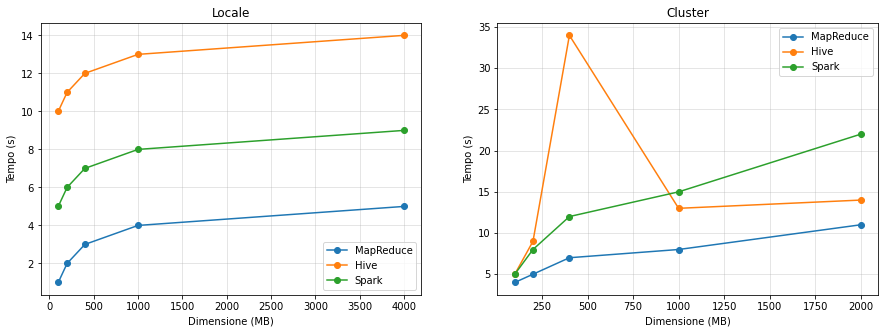

In [83]:
import matplotlib
import matplotlib.pyplot as plt
import csv

CSV_PATH='time-execute/'


def draw_plot(job_number):
    LOCAL = CSV_PATH+'local_'+str(job_number)+'.csv'
    CLUSTER = CSV_PATH+'cluster_'+str(job_number)+'.csv'
    
    dataset={}
    data_local = {}
    data_cluster = {}
    
    with open(LOCAL,'r') as csvfile:
        plots = csv.reader(csvfile, delimiter=',')
        for row in plots:
            job, *times=row
            data_local[job]=[float(x) for x in times]
        dataset[0] = {
            'name': "Locale",
            'time': data_local
        }
    
    with open(CLUSTER,'r') as csvfile:
        plots = csv.reader(csvfile, delimiter=',')
        for row in plots:
            job, *times=row
            data_cluster[job]=[float(x) for x in times]
        dataset[1] = {
            'name': "Cluster",
            'time': data_cluster
        }
        
    plot, axs = plt.subplots(1, 2, figsize=(15, 5))

    for i in range(0,2):
        axs[i].plot(dataset[i]['time']['dim'], dataset[i]['time']['1'], color='tab:blue', marker='o')
        axs[i].plot(dataset[i]['time']['dim'], dataset[i]['time']['2'], color='tab:orange', marker='o')
        axs[i].plot(dataset[i]['time']['dim'], dataset[i]['time']['3'], color='tab:green', marker='o')
        
        axs[i].set_title(dataset[i]['name'])
        axs[i].set_xlabel('Dimensione (MB)')
        axs[i].set_ylabel('Tempo (s)')
        axs[i].grid(alpha=0.4)
        axs[i].legend(['MapReduce', 'Hive', 'Spark'])
    
draw_plot(1)